In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

## Preprocessing 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,StandardScaler,QuantileTransformer,MinMaxScaler

In [ ]:
df = pd.read_csv("train-csv.txt")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0.0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0.0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0.0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0.0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0.0,unknown,no


In [ ]:
df_org = df[["age", "job", 'marital', 'education', 'balance', 'housing', 'loan',]]

In [ ]:
df_org.describe()

,age,balance
count,45211.000000,45211.000000
mean,40.936210,1362.272058
std,10.618762,3044.765829
min,18.000000,-8019.000000
25%,33.000000,72.000000
50%,39.000000,448.000000
75%,48.000000,1428.000000
max,95.000000,102127.000000


In [ ]:
df_org.marital.value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [ ]:
df_org.education.value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [ ]:
df.housing.value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [ ]:
df_org.loan.value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [ ]:
df_org.drop(df_org[df_org.balance < 1].index, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df_org.describe()

,age,balance
count,37931.000000,37931.000000
mean,40.985025,1655.270254
std,10.762390,3240.126649
min,18.000000,1.000000
25%,33.000000,226.500000
50%,39.000000,644.000000
75%,49.000000,1776.000000
max,95.000000,102127.000000


In [ ]:
df_original=df_org.copy()
print(df_original.shape,df_org.shape)


(37931, 7) (37931, 7)


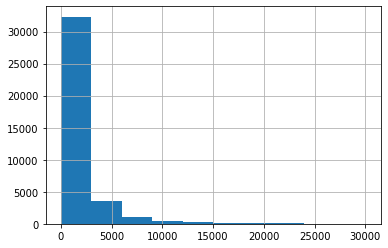

In [ ]:
df_org.balance.hist(range = (0,30000))

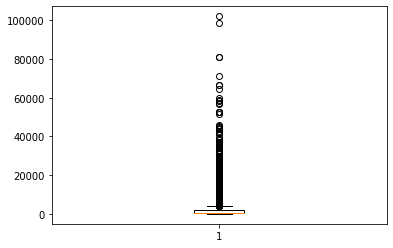

In [ ]:
plt.boxplot(df_org.balance)
plt.show()

(array([  485.,   613.,  1147.,  2950.,  7038., 11169.,  9342.,  4388.,
          751.,    48.]),
 array([ 0.        ,  1.15339724,  2.30679448,  3.46019172,  4.61358897,
         5.76698621,  6.92038345,  8.07378069,  9.22717793, 10.38057517,
        11.53397242]),
 <a list of 10 Patch objects>)

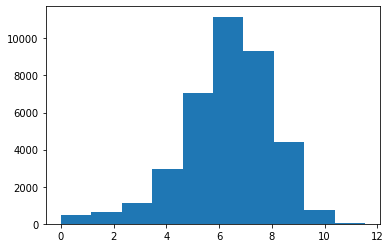

In [ ]:
plt.hist(np.log(df_org.balance))

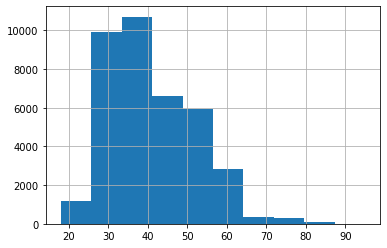

In [ ]:
df_org.age.hist()

In [ ]:
QT = QuantileTransformer(output_distribution='normal')
df_org['age'] = QT.fit_transform(df_org['age'].values.reshape(-1,1))
MinMax = MinMaxScaler()
df_org['age'] = MinMax.fit_transform(df_org['age'].values.reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


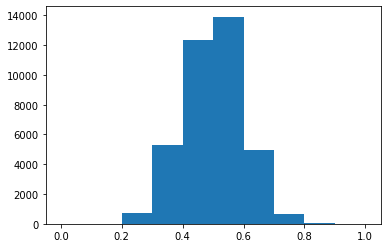

In [ ]:
plt.hist(df_org['age'])
plt.show()

In [ ]:
QT = QuantileTransformer(output_distribution='normal')
df_org['balance'] = QT.fit_transform(df_org['balance'].values.reshape(-1,1))
MinMax = MinMaxScaler()
df_org['balance'] = MinMax.fit_transform(df_org['balance'].values.reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


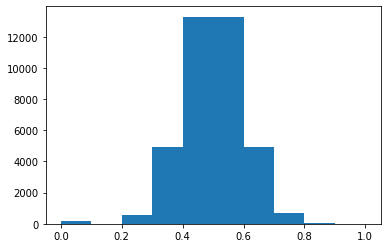

In [ ]:
plt.hist(df_org['balance'])
plt.show()

In [ ]:
#["age", "job", 'marital', 'education', 'balance', 'housing', 'loan',]
transformer = ColumnTransformer(transformers = [
    ('tnf1',OneHotEncoder(sparse = True, drop = 'first'),['job','marital',]),
    ('tnf3', OrdinalEncoder(categories= [(["unknown","primary", "secondary",'tertiary',])]),['education',]),  
    ('tnf4', OrdinalEncoder(categories= [(["no","yes",])]),['housing',]),
    ('tnf5', OrdinalEncoder(categories= [(["no","yes",])]),['loan',]),
], remainder= 'passthrough')


In [ ]:
df_org = transformer.fit_transform(df_org)

In [ ]:
df_org.shape

(37931, 18)

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics

for n_clusters in range(10,11):

    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans = kmeans.fit(df_org)
    print("Silhouette Score = {}\n".format(metrics.silhouette_score(df_org,kmeans.labels_)))
    
    df_original.reset_index(inplace = True,drop = True)
    result = pd.concat([df_original, pd.DataFrame({'cluster':kmeans.labels_})],axis=1,)
    result = result.sort_values(by=['cluster'], ascending=[True])
    #result.drop('index',axis = 1, inplace = True)
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):    

      print('{}\t{}\t\t{}'.format('Cluster', 'Age', 'Balance'))
      print('{}'.format('-' * 80))
      for cluster in result.cluster.unique():
        print('{}\t{:.2f} ({:.2f})\t{:.2f} ({:.2f})\t'.format
        (cluster, result[result.cluster==cluster].age.mean()
        , result[result.cluster==cluster].age.std()
        , result[result.cluster==cluster].balance.mean()
        , result[result.cluster==cluster].balance.std()))
        print('{}'.format('-' * 80))
        #print('{}\t{}'.format(
            #result[result.cluster==cluster].education.value_counts().sort_index(),
            #result[result.cluster==cluster].job.value_counts().sort_index()))
        print()
       # print(result.education.value_counts().sort_index().plot(kind = 'bar'))
        plt.show()
        print('{}'.format('-' * 80))

Silhouette Score = 0.24999428766473758

Cluster	Age		Balance
--------------------------------------------------------------------------------
0	45.64 (11.32)	1677.31 (3510.16)	
--------------------------------------------------------------------------------

--------------------------------------------------------------------------------
1	41.85 (9.29)	1518.89 (2876.01)	
--------------------------------------------------------------------------------

--------------------------------------------------------------------------------
2	33.07 (8.08)	1269.97 (2398.02)	
--------------------------------------------------------------------------------

--------------------------------------------------------------------------------
3	35.20 (7.54)	1429.29 (2646.01)	
--------------------------------------------------------------------------------

--------------------------------------------------------------------------------
4	43.39 (10.17)	2245.41 (4347.86)	
----------------------------------

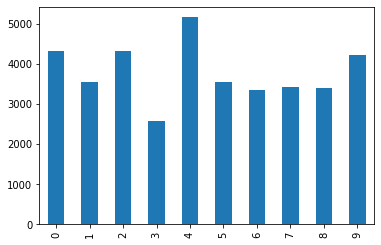

In [ ]:
result.cluster.value_counts().sort_index().plot(kind = 'bar')

In [ ]:
result

,age,job,marital,education,balance,housing,loan,cluster
37930,37,entrepreneur,married,secondary,2971,no,no,0
11004,40,services,married,secondary,22,yes,yes,0
20546,52,admin.,married,secondary,299,no,no,0
25454,60,housemaid,divorced,secondary,2063,no,no,0
25453,63,retired,married,secondary,1612,no,no,0
...,...,...,...,...,...,...,...,...
29024,34,management,single,tertiary,2679,yes,no,9
29023,31,self-employed,single,tertiary,253,yes,no,9
29017,26,management,single,tertiary,199,yes,no,9
29053,25,entrepreneur,single,tertiary,140,yes,no,9


In [ ]:
result.to_excel("output.xlsx",sheet_name='Sheet_name_1') 